In [113]:
# 외부 데이터 테스트

import module.TorchDataset as td
import importlib
importlib.reload(td) # 클래스 수정 시 import 리로드


import torch.nn as nn
from torchvision import models
from torchsummary import summary
import torch
cnn_runner = tdCNN.TorchDatasetCNN()

epoch = 10
device = cnn_runner.get_device()
learning_rate = 0.001
save_path = ""

import module.TorchDatasetCNN as tdCNN
import importlib
importlib.reload(tdCNN)

save_path = r"E:\02.공부\02.코딩\01.Python\01.Alphaco\02.코드\03.프로젝트\03.이미지분류\00.Code\save_model\03.Torch_CNN\05.resnet50_Layer4_Finetune\resnet50_Layer4_Finetune.pth"
model = models.resnet50(pretrained=False).to(device)
model.fc = nn.Linear(model.fc.in_features, 2)

# # 모델 로딩
model = cnn_runner.load_model(model, save_path, device)
model.to(device)

c:\Users\HS\anaconda3\envs\ALPHACO_PJ_03\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HS\anaconda3\envs\ALPHACO_PJ_03\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [114]:
# Test 외부 데이터 로드
import module.TorchDataset as td
import importlib
importlib.reload(td) # 클래스 수정 시 import 리로드

sep = "\\"
extension = "jpg"
img_size = 224
sample_path = "C:\\Users\\HS\\Downloads\\ext_data\\"
batch_size = 20
sample_dataset = td.TorchDataset(sample_path, sep, extension, img_size, "test")
print("데이터 갯수 :", len(sample_dataset))

# 랜덤, 버리기 = False로 모든 데이터 순서대로 넣어줌
sample_dataloader = cnn_runner.get_dataloader(sample_dataset, batch_size, False, False)
print("로더 사이즈(배치20) :", len(sample_dataloader))

# 라벨 확인
print(sample_dataset.get_label_dict())

데이터 갯수 : 10
로더 사이즈(배치20) : 1
{'nowildfire': 0, 'wildfire': 1}


In [80]:
# 모델 평가
model.eval()
loader = iter(sample_dataloader)
data = next(loader)
x, y = data
x = x.to(device)
y = y.to(device)

con = model(x)
_, result = torch.max(con, 1)
result, y

(tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 1]),
 tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [81]:
print(f"맞춘갯수 : {(result == y).sum().item()} / 전체갯수 : {len(sample_dataset)}")

맞춘갯수 : 9 / 전체갯수 : 10


In [ ]:
# 객체인식 방식으로 테스트 수행 (크기가 크면 img_size만큼 반복 탐색)
import module.Service as sv
importlib.reload(sv)
service = sv.Service()

for i in range(5):
    # sample_path = f"C:\\Users\\HS\\Downloads\\ext_data\\nowildfire\\no_test{i+6}.jpg" # nofire
    sample_path = f"C:\\Users\\HS\\Downloads\\ext_data\\wildfire\\no_test{i+1}.jpg" # fire
    service.eval_in_realmap(model, sample_path, img_size, device)

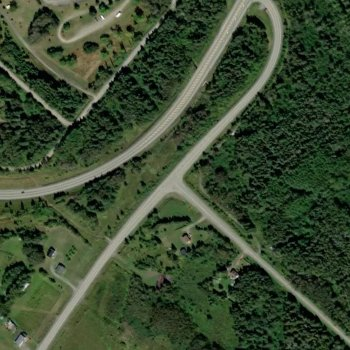

In [156]:
import matplotlib.pyplot as plt
from PIL import Image

# path1 = r"C:\Users\HS\OneDrive\바탕 화면\-68.12449,48.6256.jpg"
path1 = r"E:\02.공부\02.코딩\01.Python\01.Alphaco\02.코드\03.프로젝트\03.이미지분류\01.Data\fire\test\wildfire\-68.12449,48.6256.jpg"
img = Image.open(path1)
red, green, blue = img.split()
img


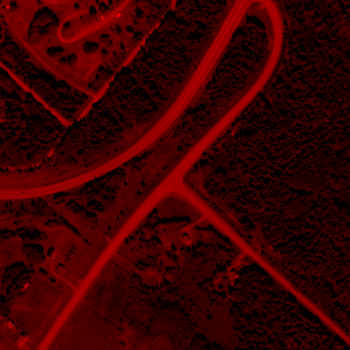

In [157]:
empty = Image.new('L', img.size)
Image.merge("RGB", (red, empty, empty))

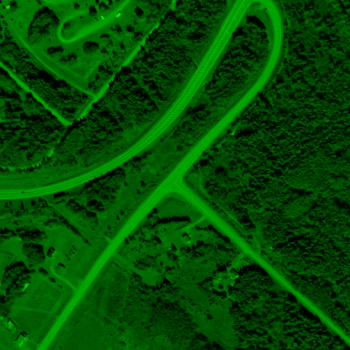

In [158]:
Image.merge("RGB", (empty, green, empty))

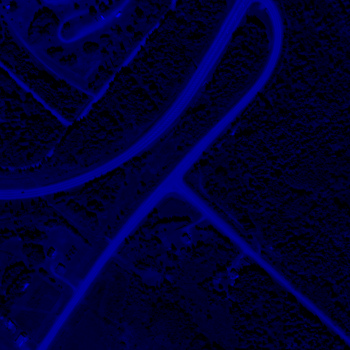

In [159]:
Image.merge("RGB", (empty, empty, blue))

In [160]:
img1 = sample_dataset.resize_image(path1)
img1 = sample_dataset.padding_image(img1)
img1 = sample_dataset.transform(img1)

img1 = img1.reshape(1,3,224,224)
model(img1)

tensor([[-6.4842,  6.3586]], grad_fn=<AddmmBackward0>)

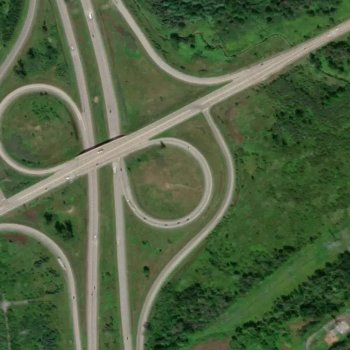

In [150]:
import matplotlib.pyplot as plt
from PIL import Image

path2 = r"E:\02.공부\02.코딩\01.Python\01.Alphaco\02.코드\03.프로젝트\03.이미지분류\01.Data\fire\test\nowildfire\-75.591351,45.397808.jpg"
img2 = Image.open(path2)
red, green, blue = img2.split()
img2



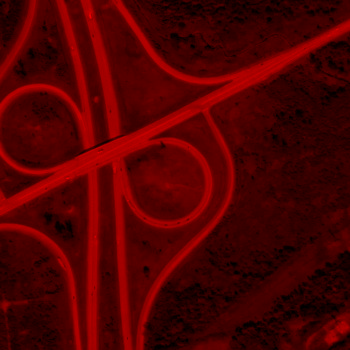

In [151]:
empty = Image.new('L', img.size)
Image.merge("RGB", (red, empty, empty))

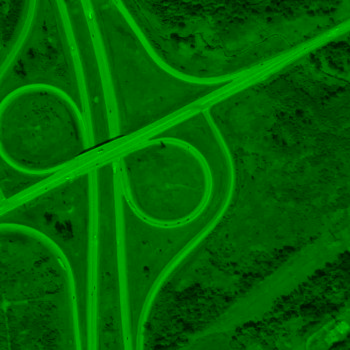

In [152]:
Image.merge("RGB", (empty, green, empty))

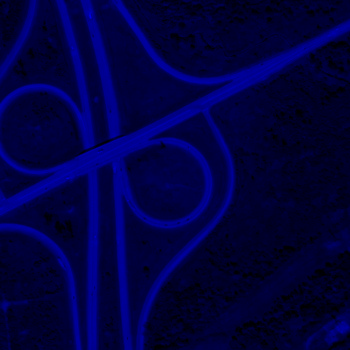

In [153]:
Image.merge("RGB", (empty, empty, blue))

In [154]:
img2 = sample_dataset.resize_image(path2)
img2 = sample_dataset.padding_image(img2)
img2 = sample_dataset.transform(img2)

img2 = img1.reshape(1,3,224,224)

In [131]:
model(img2)

tensor([[ 2.5340, -2.6354]], grad_fn=<AddmmBackward0>)